In [1]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
e  = np.e

## Lets first create a mesh and a function(slice of it since it is periodic) and observe it between 0 and T_0(period)

In [2]:
edist_atom = np.load('edist_atom_384_384_192.npy')
x_values = np.arange(192) * (2.08/192)
y_values = np.arange(192) * (2.08/192)
z_values = np.arange(192) * (2.08/192)
xx, yy, zz = np.meshgrid(x_values, y_values,z_values)
direction1 = np.array([1,1,1])
direction2 = np.array([1,0,0])
direction3 = np.array([1,1,0])

In [3]:
def analysis_func(direction,func, xx,yy,zz,wlist=np.linspace(-2.55,2.65,num=50) ):
    direction_hat = direction / (direction**2).sum()**0.5
    X_real = np.zeros(len(wlist))
    X_imag = np.zeros(len(wlist))
    for c,w in enumerate(wlist):
        expo = e** (-1j * w * (direction_hat[0]*xx + direction_hat[1]*yy+ direction_hat[2]*zz))        
        integrate  = func * expo
        integral_real = np.trapz(np.trapz(np.trapz(integrate.real, axis=1, dx = (2.08/192)), dx = (2.08/192)), dx = (2.08/192))
        integral_imag = np.trapz(np.trapz(np.trapz(integrate.imag, axis=1, dx = (2.08/192)), dx = (2.08/192)), dx = (2.08/192))
        X_real[c] = integral_real
        X_imag[c] = integral_imag
    X = X_real + 1j*X_imag    
    return X

In [4]:
wlist=np.linspace(0,2*pi,num=60)

X1 = analysis_func(direction1,edist_atom, xx,yy,zz,wlist=wlist )
X2 = analysis_func(direction2,edist_atom, xx,yy,zz,wlist=wlist )
X3 = analysis_func(direction3,edist_atom, xx,yy,zz,wlist=wlist )

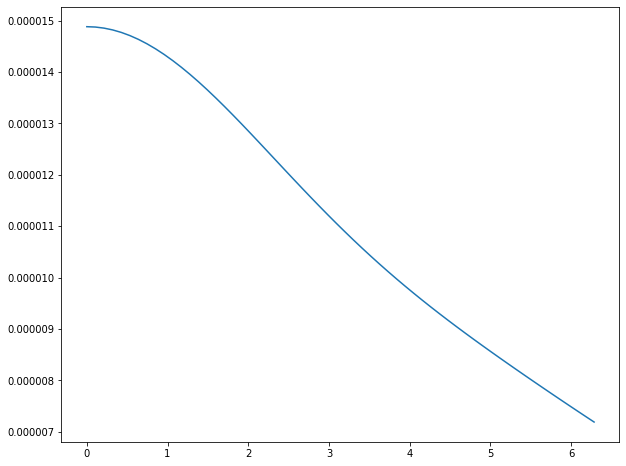

In [5]:
plt.figure(figsize=(10,8))
plt.plot(wlist,np.abs(X1))


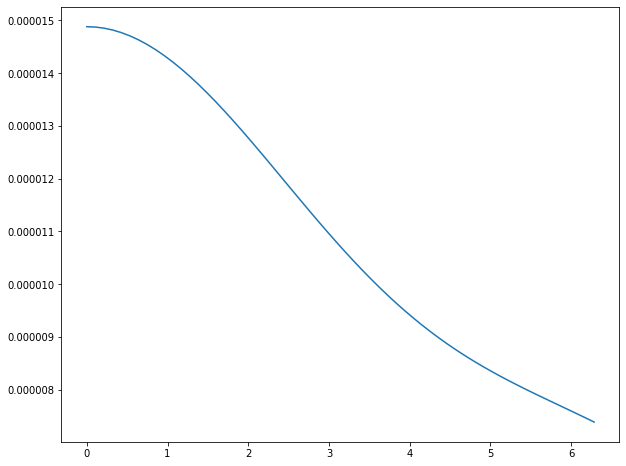

In [6]:
plt.figure(figsize=(10,8))
plt.plot(wlist,np.abs(X2))


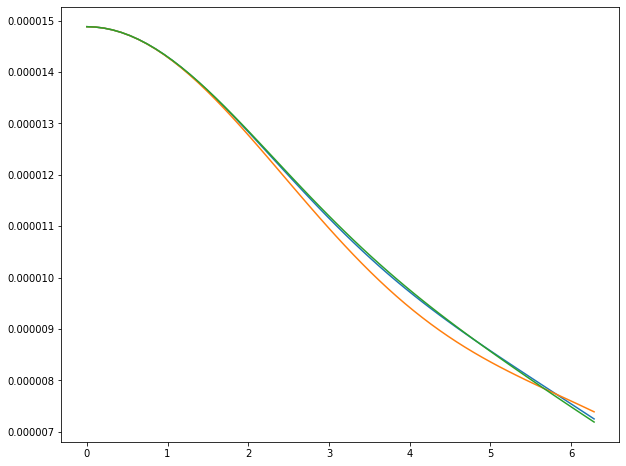

In [7]:
plt.figure(figsize=(10,8))
plt.plot(wlist,np.abs(X3))
plt.plot(wlist,np.abs(X2))
plt.plot(wlist,np.abs(X1))

In [8]:
np.save('384-384-192_111.npy', X1)
np.save('384-384-192_100.npy', X2)